https://arxiv.org/pdf/1312.6114.pdf (vae paper)<br/>
https://docs.google.com/presentation/d/1FkkhH86URDzAzjNPdCvupV6kqoBNNarVQQgB6ppZlx4/edit#slide=id.g26890724310_0_7 (latent variable models lecture notes) <br/>

In [ ]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torch.utils.data import default_collate, DataLoader
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
dataset = load_dataset('mnist')

Found cached dataset mnist (/Users/arun/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
def transform_data(b):
    b['image'] = [TF.to_tensor(o) for o in  b['image']]
    return  b

def collate_dict(b):
    c = default_collate(b)
    return (c['image'], c['label'])

In [ ]:
batch_size = 25

In [ ]:
train_ds = dataset['train'].with_transform(transform_data)
valid_ds = dataset['test'].with_transform(transform_data)

In [ ]:
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_dict)
valid_dl = DataLoader(valid_ds, batch_size=batch_size*2, shuffle=False, collate_fn=collate_dict)

In [ ]:
xb,yb = next(iter(train_dl))
xb.shape,yb.shape

(torch.Size([25, 1, 28, 28]), torch.Size([25]))

tensor(3)


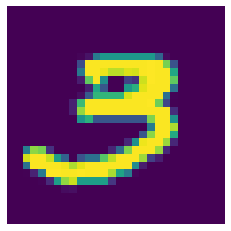

In [ ]:
plt.imshow(xb[10][0]);
plt.axis('off');
print(yb[10])

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=90):
        super().__init__()
        self.latent_dim = latent_dim
        
        self.stride = 2
        self.kernel_size = 3
        self.padding = self.kernel_size//2
        
        self.enc = nn.Sequential(*[
            nn.Conv2d(1, 8, kernel_size=self.kernel_size, padding=self.padding, stride=self.stride),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=self.kernel_size, padding=self.padding, stride=self.stride),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=self.kernel_size, padding=self.padding, stride=self.stride),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=self.kernel_size, padding=self.padding, stride=self.stride),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=self.kernel_size, padding=self.padding, stride=self.stride),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64, self.latent_dim)
        ]) 
        
        self.dec = nn.Sequential(*[])
    
    def forward(self, x):
        out = self.enc(x)
        return out

In [ ]:
model = AutoEncoder()
model

AutoEncoder(
  (enc): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=64, out_features=90, bias=True)
  )
)

In [ ]:
out = model(xb)
out.shape

torch.Size([25, 90])